In [1]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
import matplotlib, collections
from scipy.stats import norm
import imp, os, pickle
from sklearn.metrics.pairwise import pairwise_distances
import warnings
warnings.filterwarnings("ignore")
from matplotlib import collections  as mc

import sys
sys.path.insert(0, '../scripts/')
import data_loader, helper
sns.set(style="darkgrid")
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
print "Setting random seeds"

Setting random seeds


In [9]:
cluster_distance = np.load('../datasets/rnaseq/100k_200_distances.npy')
n = cluster_distance.shape[0]
cluster_distance_f = cluster_distance.flatten()
estimate = np.mean(cluster_distance, axis=0)

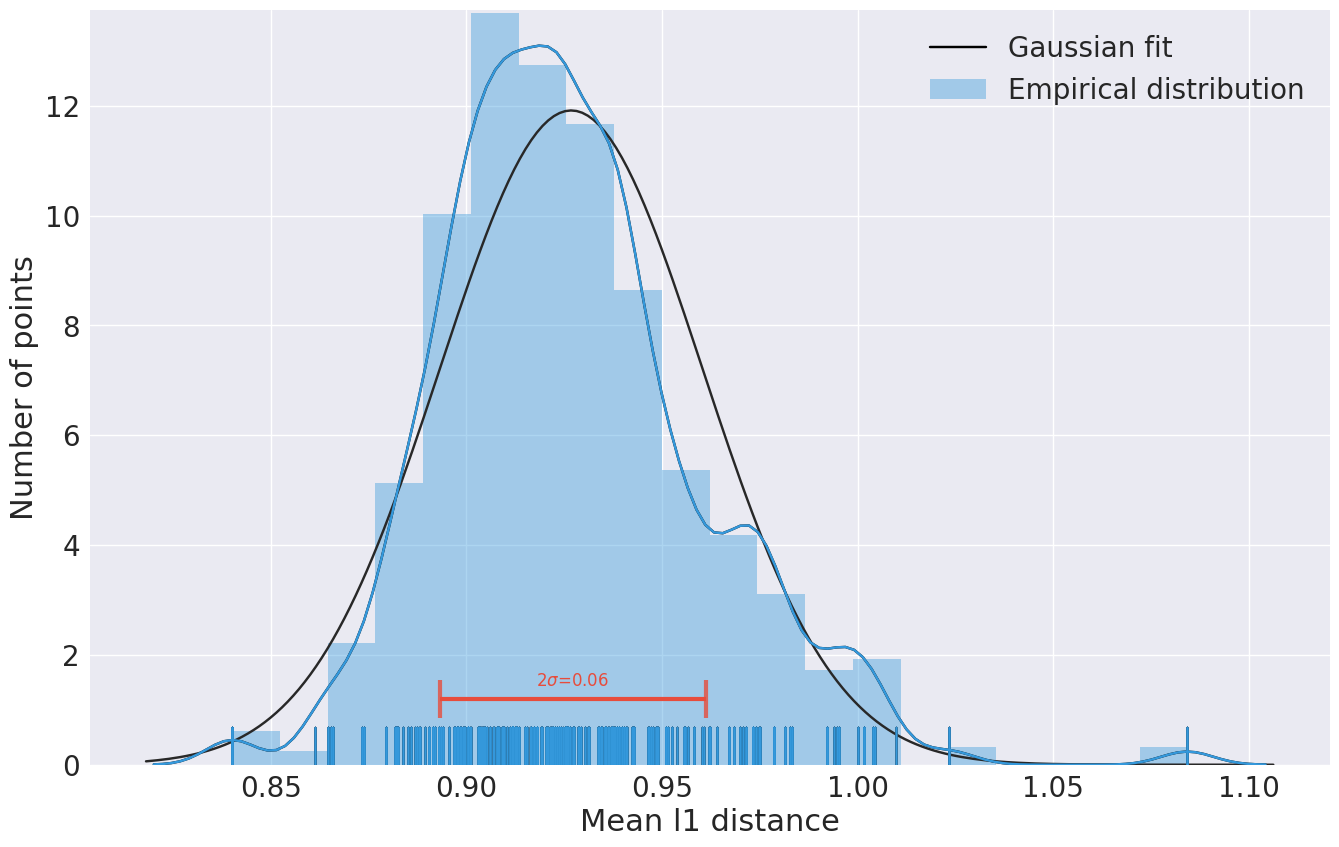

In [10]:
np.random.seed(10)
plt.figure(figsize=(16,10))
sns.set(font_scale = 2)
x = np.random.choice( estimate, size=2000,)
fig = sns.distplot(x, fit=norm, color='black', rug=True,hist=False, bins=20, label="Gaussian fit")
fig = sns.distplot(x, norm_hist=True, color=colors[1], rug=True, bins=20, label="Empirical distribution")
fig.set(xlabel="Mean l1 distance", ylabel="Number of points" )

gap =  .7
h_pos = 1.2
h_lines = [ [(estimate.mean()-estimate.std(), h_pos), (estimate.mean()+estimate.std(), h_pos)] ]
v_lines = [ [(estimate.mean()-estimate.std(), h_pos-gap/2), (estimate.mean()-estimate.std(), h_pos+gap/2)],
            [(estimate.mean()+estimate.std(), h_pos-gap/2), (estimate.mean()+estimate.std(), h_pos+gap/2)]  ]
h_lc = mc.LineCollection(h_lines, linewidths=3, colors=colors[3], alpha=1)
fig.add_collection(h_lc)
v_lc = mc.LineCollection(v_lines, linewidths=3, colors=colors[3], alpha=.8)
fig.add_collection(v_lc)
two_sigma = int(2*estimate.std()*100)/100.
fig.text(estimate.mean()-estimate.std()*.275, h_pos+gap/3, "$2\sigma$="+str(two_sigma), fontsize=12, color=colors[3])


fig.legend()
plt.show()

## Choosing 4 points and ploting their distance histogram

0 80
1 91
2 153
3 191


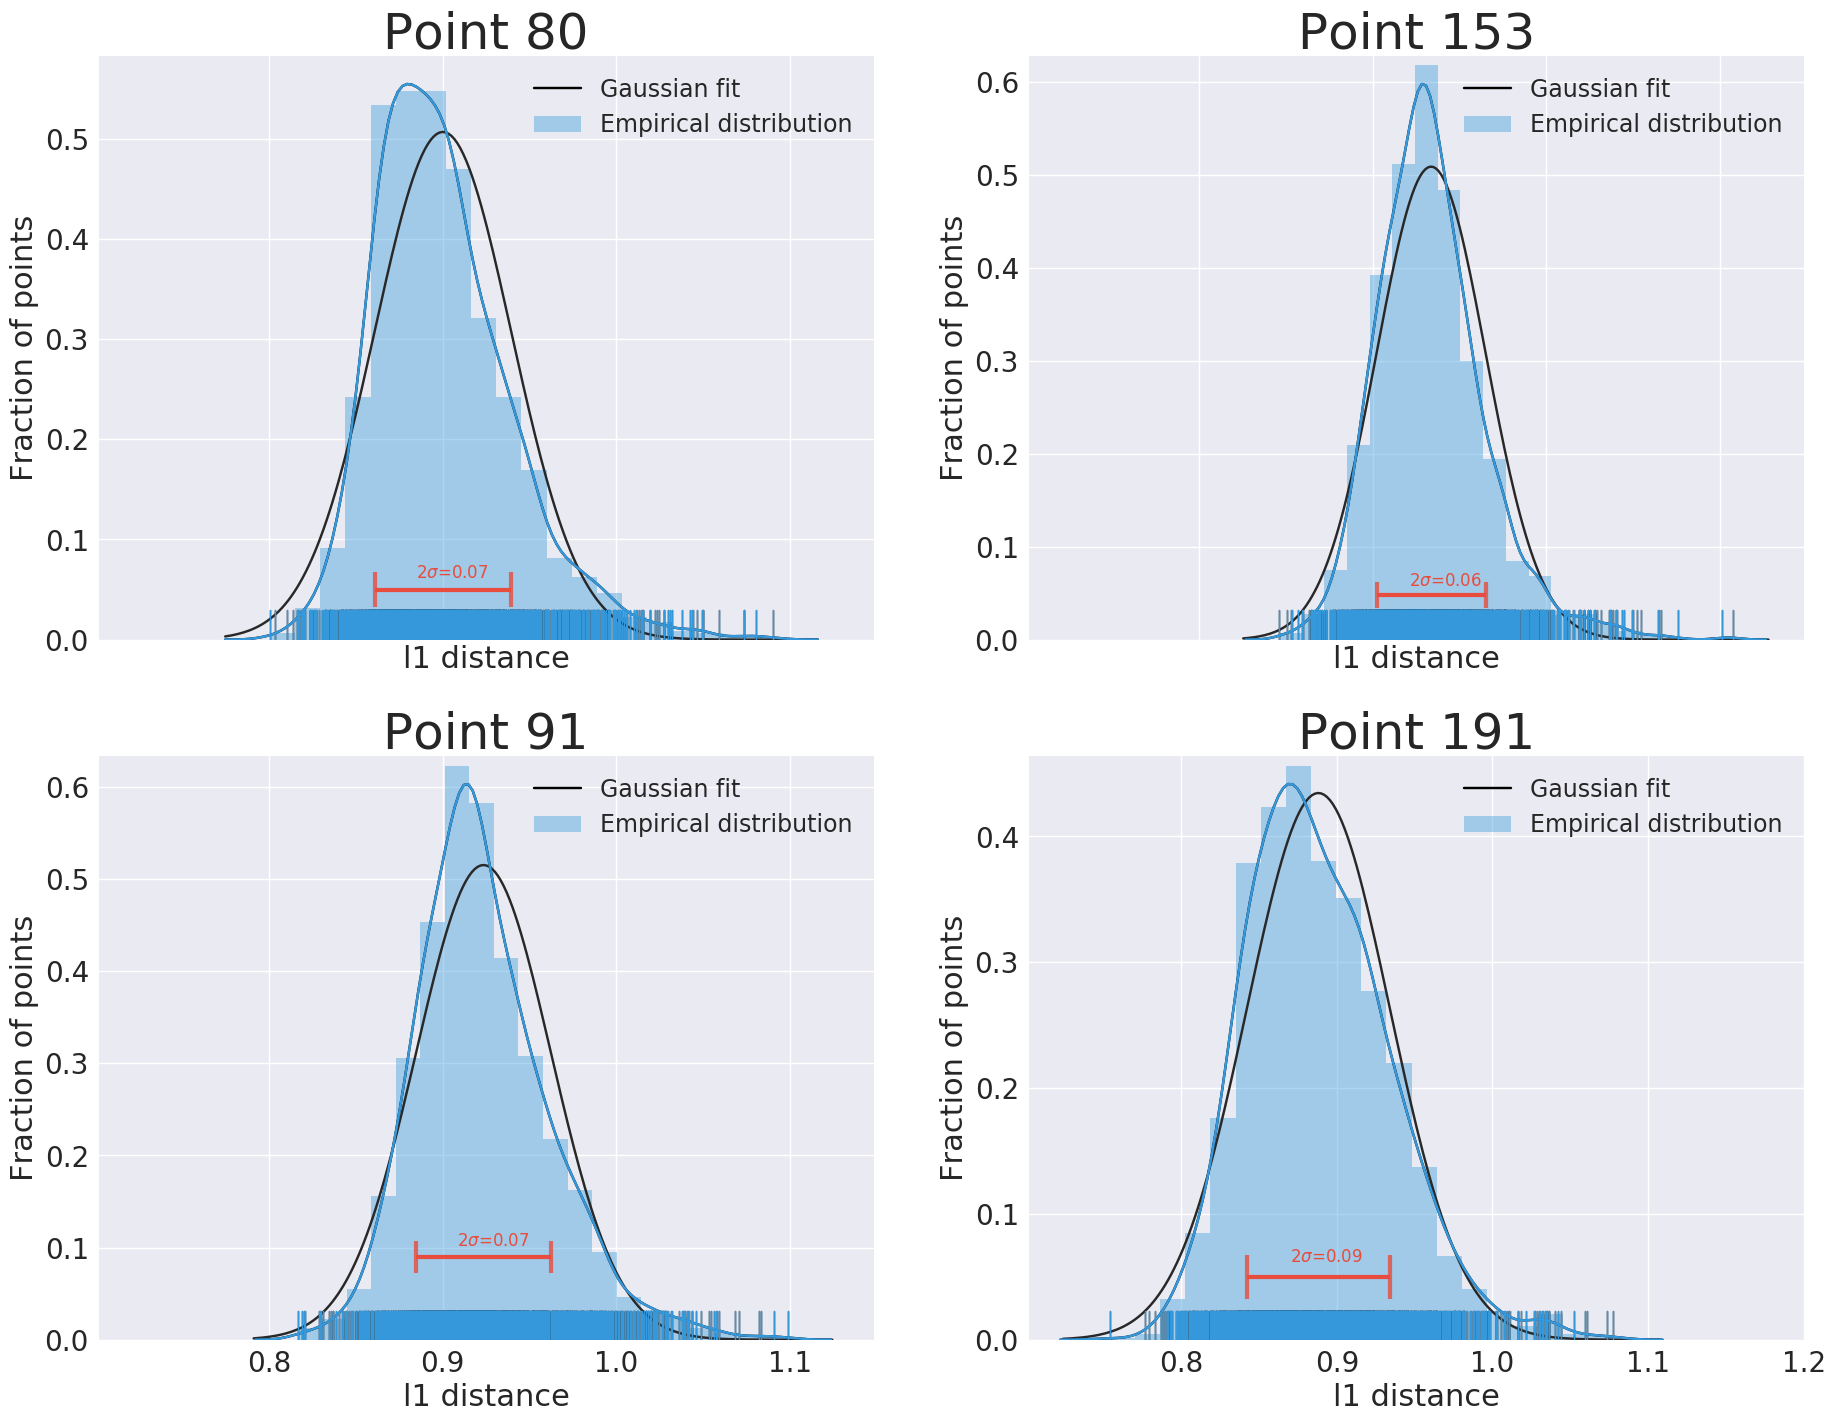

In [11]:
np.random.seed(11)
s = 2
indices = np.random.randint(200,size=s*s)
h_pos_array = [1,1.8,1.2,1]
indices.sort()
f, axes = plt.subplots(s, s, figsize=(22, 17), sharex=True)
sns.set(font_scale = 3)

for i in range(s*s):
    index = indices[i]
    print i, index
    #Sampling only 1000 points for each randomly chosen point to reduce computation time
    data = cluster_distance[:,index]
    data = np.random.choice( data, size=2000,)
    data = data[data.nonzero()]
    fig = sns.distplot(data, fit=norm, color='black', rug=True, 
                       hist=False, bins=20, label="Gaussian fit", ax=axes[i%s, i/s])
    fig = sns.distplot(data, norm_hist=True, color=colors[1], rug=True, 
                       bins=20, label="Empirical distribution", ax=axes[i%s, i/s])
    fig.set(xlabel="l1 distance",  ylabel="Fraction of points" )
    fig.set_xticks(np.arange(0.8, 1.25, .1))
    fig.set_yticklabels(np.arange(0,1,.1))

    gap =  .7
    h_pos = h_pos_array[i]
    h_lines = [ [(data.mean()-data.std(), h_pos), (data.mean()+data.std(), h_pos)] ]
    v_lines = [ [(data.mean()-data.std(), h_pos-gap/2), (data.mean()-data.std(), h_pos+gap/2)],
                [(data.mean()+data.std(), h_pos-gap/2), (data.mean()+data.std(), h_pos+gap/2)]  ]
    h_lc = mc.LineCollection(h_lines, linewidths=3, colors=colors[3], alpha=1)
    fig.add_collection(h_lc)
    v_lc = mc.LineCollection(v_lines, linewidths=3, colors=colors[3], alpha=.8)
    fig.add_collection(v_lc)
    two_sigma = int(2*data.std()*100)/100.
    fig.text(data.mean()-data.std()*.400, h_pos+gap/3, "$2\sigma$="+str(two_sigma), fontsize=12, color=colors[3])

    
    
    fig.legend(loc=1, prop={'size': 17})
    fig.set_title("Point "+str(index))

In [ ]:
fractional_values = np.array([1, .65, .5, .3, .1, .025, 0.01,  .0003, 0.00001, 0.000001])
index = 0
fractional_positions = np.zeros_like(fractional_values)
for i, row in enumerate(left_over_array):
    frac = row[0].shape[0]/110000.0
    try:
        fractional_positions[np.where(fractional_values<frac)[0][0]] = i
    except:
        print np.where(fractional_values<frac)[0], frac,i
print fractional_positions

size = 100
size_array = [0]
total_size=  0
for i, index in enumerate(fractional_positions):
    current_size = min(size, left_over_array[int(index)][0].shape[0])
    total_size += current_size
    size_array += [total_size]
print size_array
summary_df = pd.DataFrame(data=np.zeros((total_size, 2)), columns=['step', 'arm'], dtype=int)
for i, index in enumerate(fractional_positions):
    current_size = left_over_array[int(index)][0].shape[0]
    summary_df.iloc[size_array[i]:size_array[i+1]]['step'] = i
    summary_df.iloc[size_array[i]:size_array[i+1]]['arm'] = \
    np.random.choice( summary[int(index)][0][:current_size],size= min(size,current_size), replace=False)


pos = np.unique(np.array(summary_df['arm']))
print pos.shape
summary_df

distance = pairwise_distances(
                    gene_matrix_normalised, 
                    gene_matrix_normalised[pos],
                    metric='l1',
                    n_jobs=1)
df_dist = pd.DataFrame(data=np.vstack( [pos, distance.mean(axis=0)] ).T, columns=['arm', 'mean'] , dtype='float')
df_final = df_dist.merge(summary_df.astype('float'), right_on='arm', left_on='arm').sort_values('step')
df_final

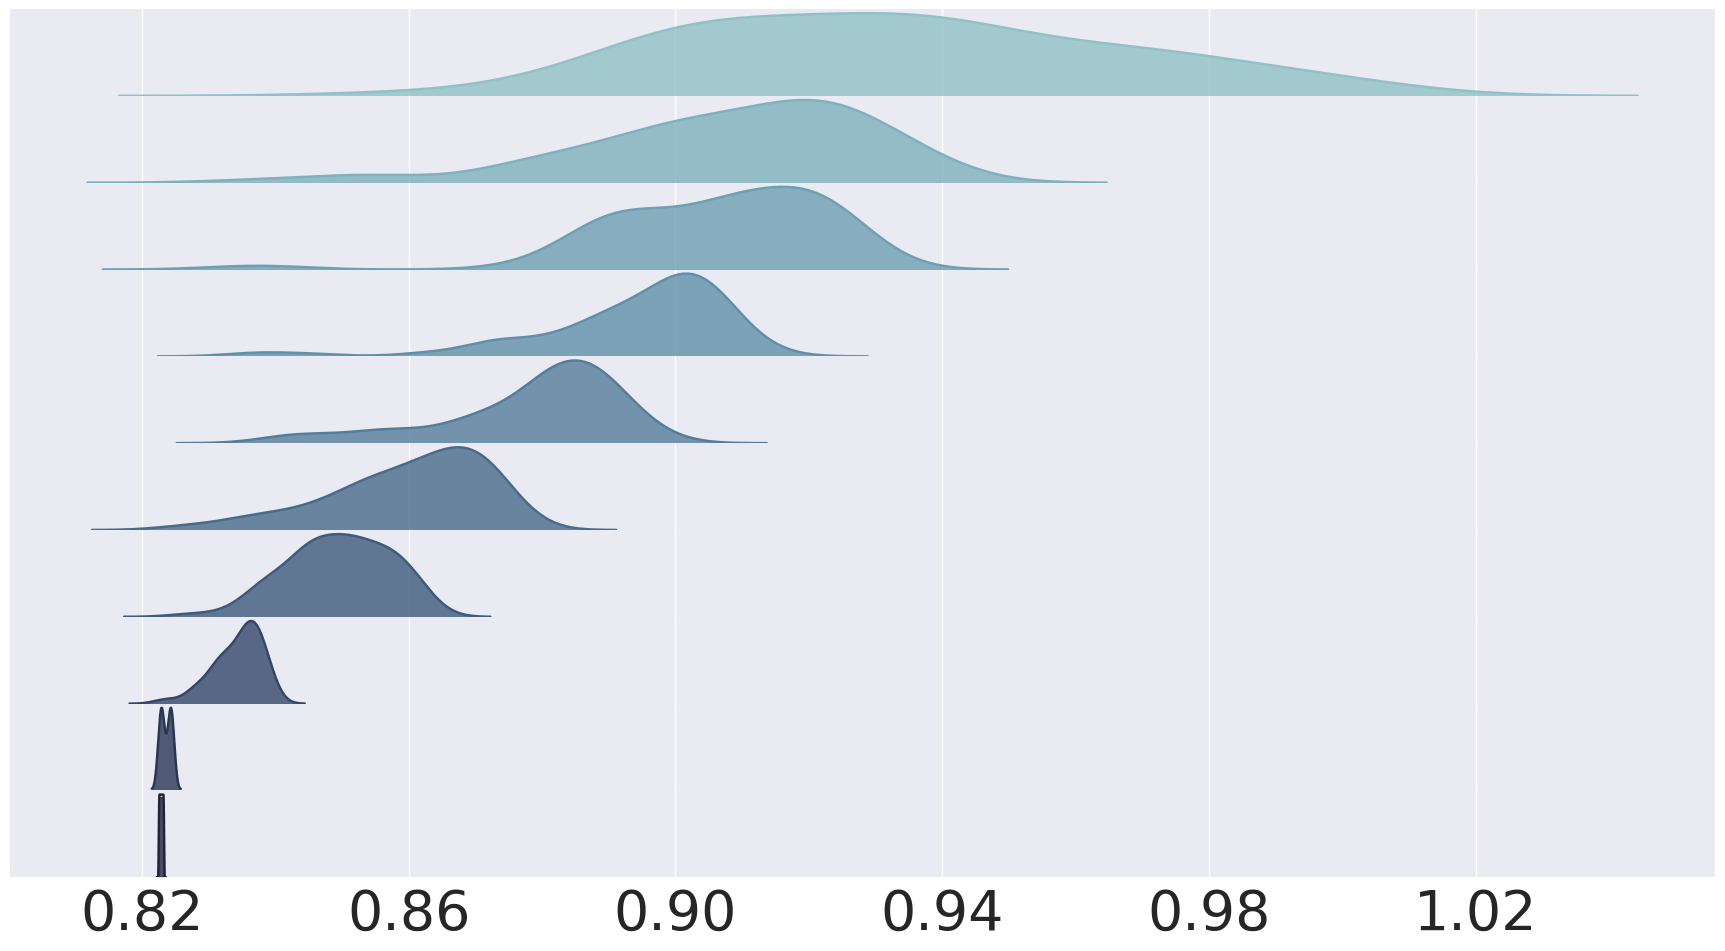

In [108]:
min_mu = np.array(df_final.iloc[-1])[1]
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
colors = pal.as_hex()
sns.set(font_scale = 3)
f, axes = plt.subplots(len(fractional_positions), figsize=(22, len(fractional_positions)*1.15), sharex=True)
for i in range(len(fractional_positions[:-1])):
    fig = sns.kdeplot( np.array(df_final.loc[df_final['step']==i]['mean']),\
                       ax=axes[i], color=colors[i%10], kernel='gau')
    x, y = fig.get_lines()[0].get_data()
    fig.set_yticks([])
    fig.set_xticks(np.arange(0.82,1.2,.04))
    fig.fill_between(x,y,0, alpha=.8, color=colors[i%10])
    f.subplots_adjust(wspace=0, hspace=0)
    ax = plt.gca()
i = i + 1
final_mean = np.array(df_final.loc[df_final['step']==i]['mean'])[0]
x = np.arange(final_mean-.0004,final_mean+.0004,.00001)
y = 0.03*np.ones_like(x)
fig = sns.kdeplot( x, ax=axes[i], color=colors[i%10], kernel='cos')
fig.fill_between(x, y*40500, 0, alpha=.8, color=colors[-1])
fig.set_yticks([])
plt.show()

In [64]:
left_over_summary = np.zeros(len(left_over_array))
n = cluster_distance.shape[0]
for i in range(len(left_over_array)):
    left_over_summary[i] = left_over_array[i][0].shape[0]/(0.0+n)

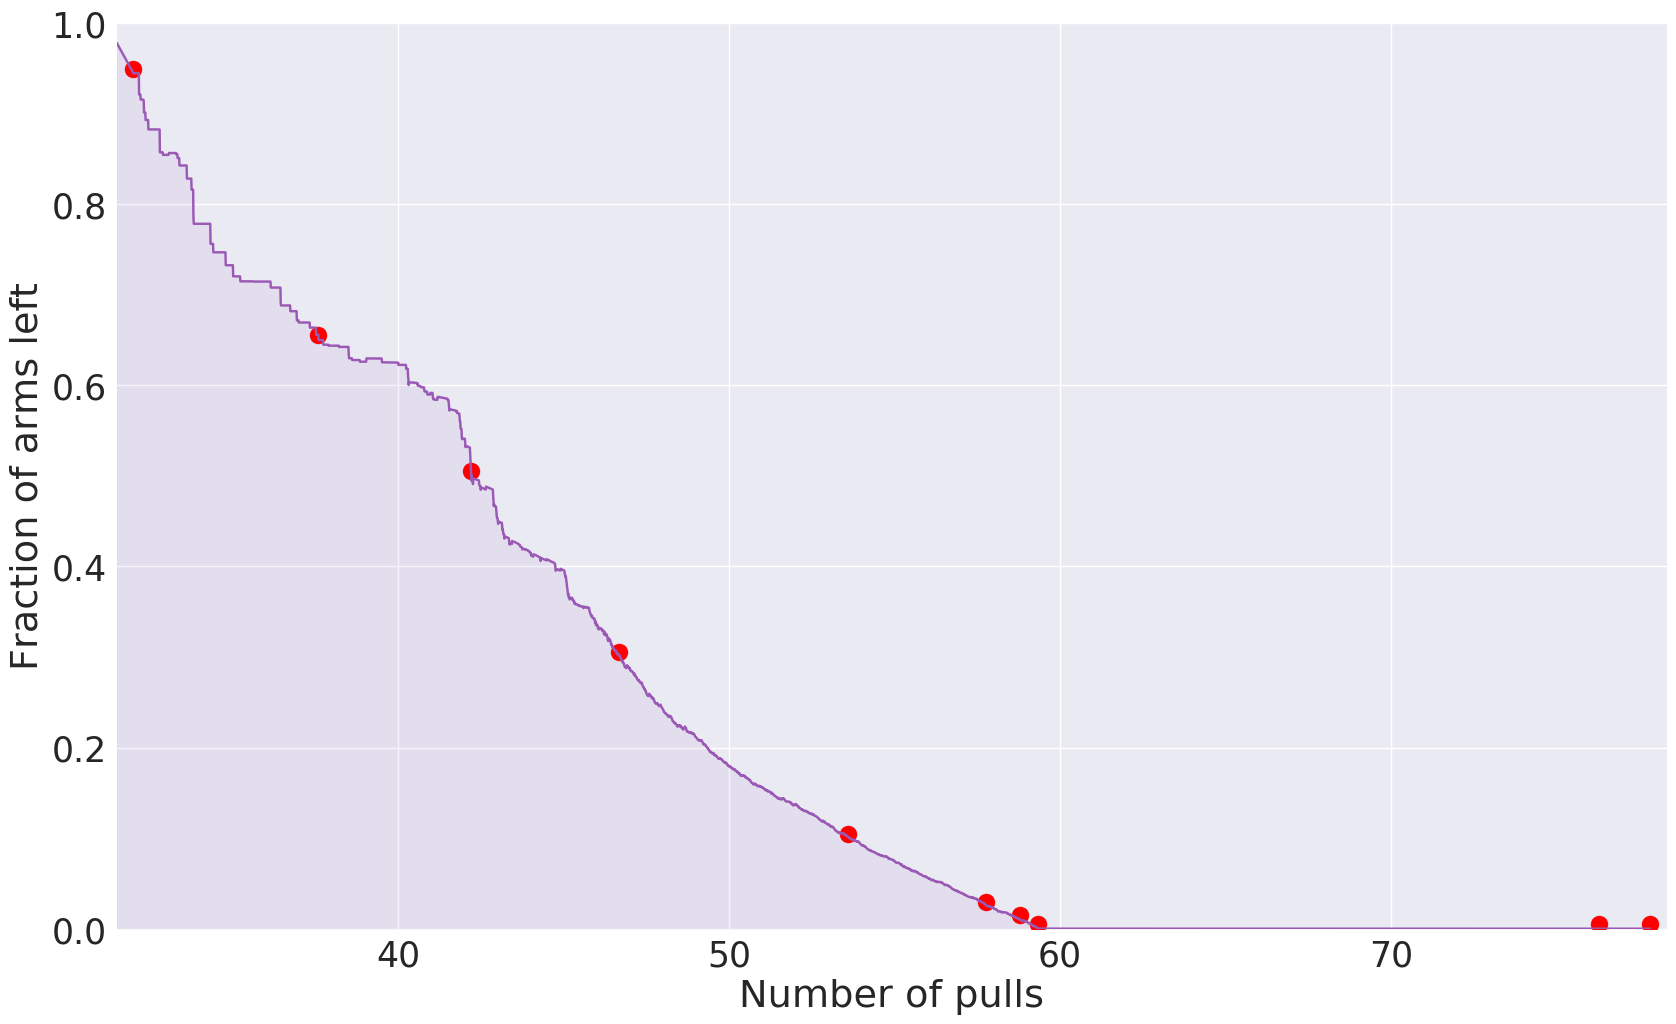

In [111]:
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig = plt.figure(figsize=(20,12))
x = 32+32*32.*np.arange(0,len(left_over_summary))/n
y = left_over_summary
sns.set(font_scale = 2.5)
x_shade = x.copy()
x_shade[0] -= 0.5
plt.plot(x_shade,y,color=colors[0])
plt.fill_between(x_shade, y, 0, color=colors[0], alpha=0.08)
fractional_values_p = fractional_values.copy()
fractional_values_p[0] = np.max(y[10:])
plt.scatter(32+32*32.*fractional_positions/n, fractional_values_p+0.005, color='red', s=150)
plt.ylabel("Fraction of arms left")
plt.xlabel("Number of distance evaluations per armw")
plt.xlim(min(x)-0.5,max(x)+0.5)
plt.ylim(0,1)
plt.show()

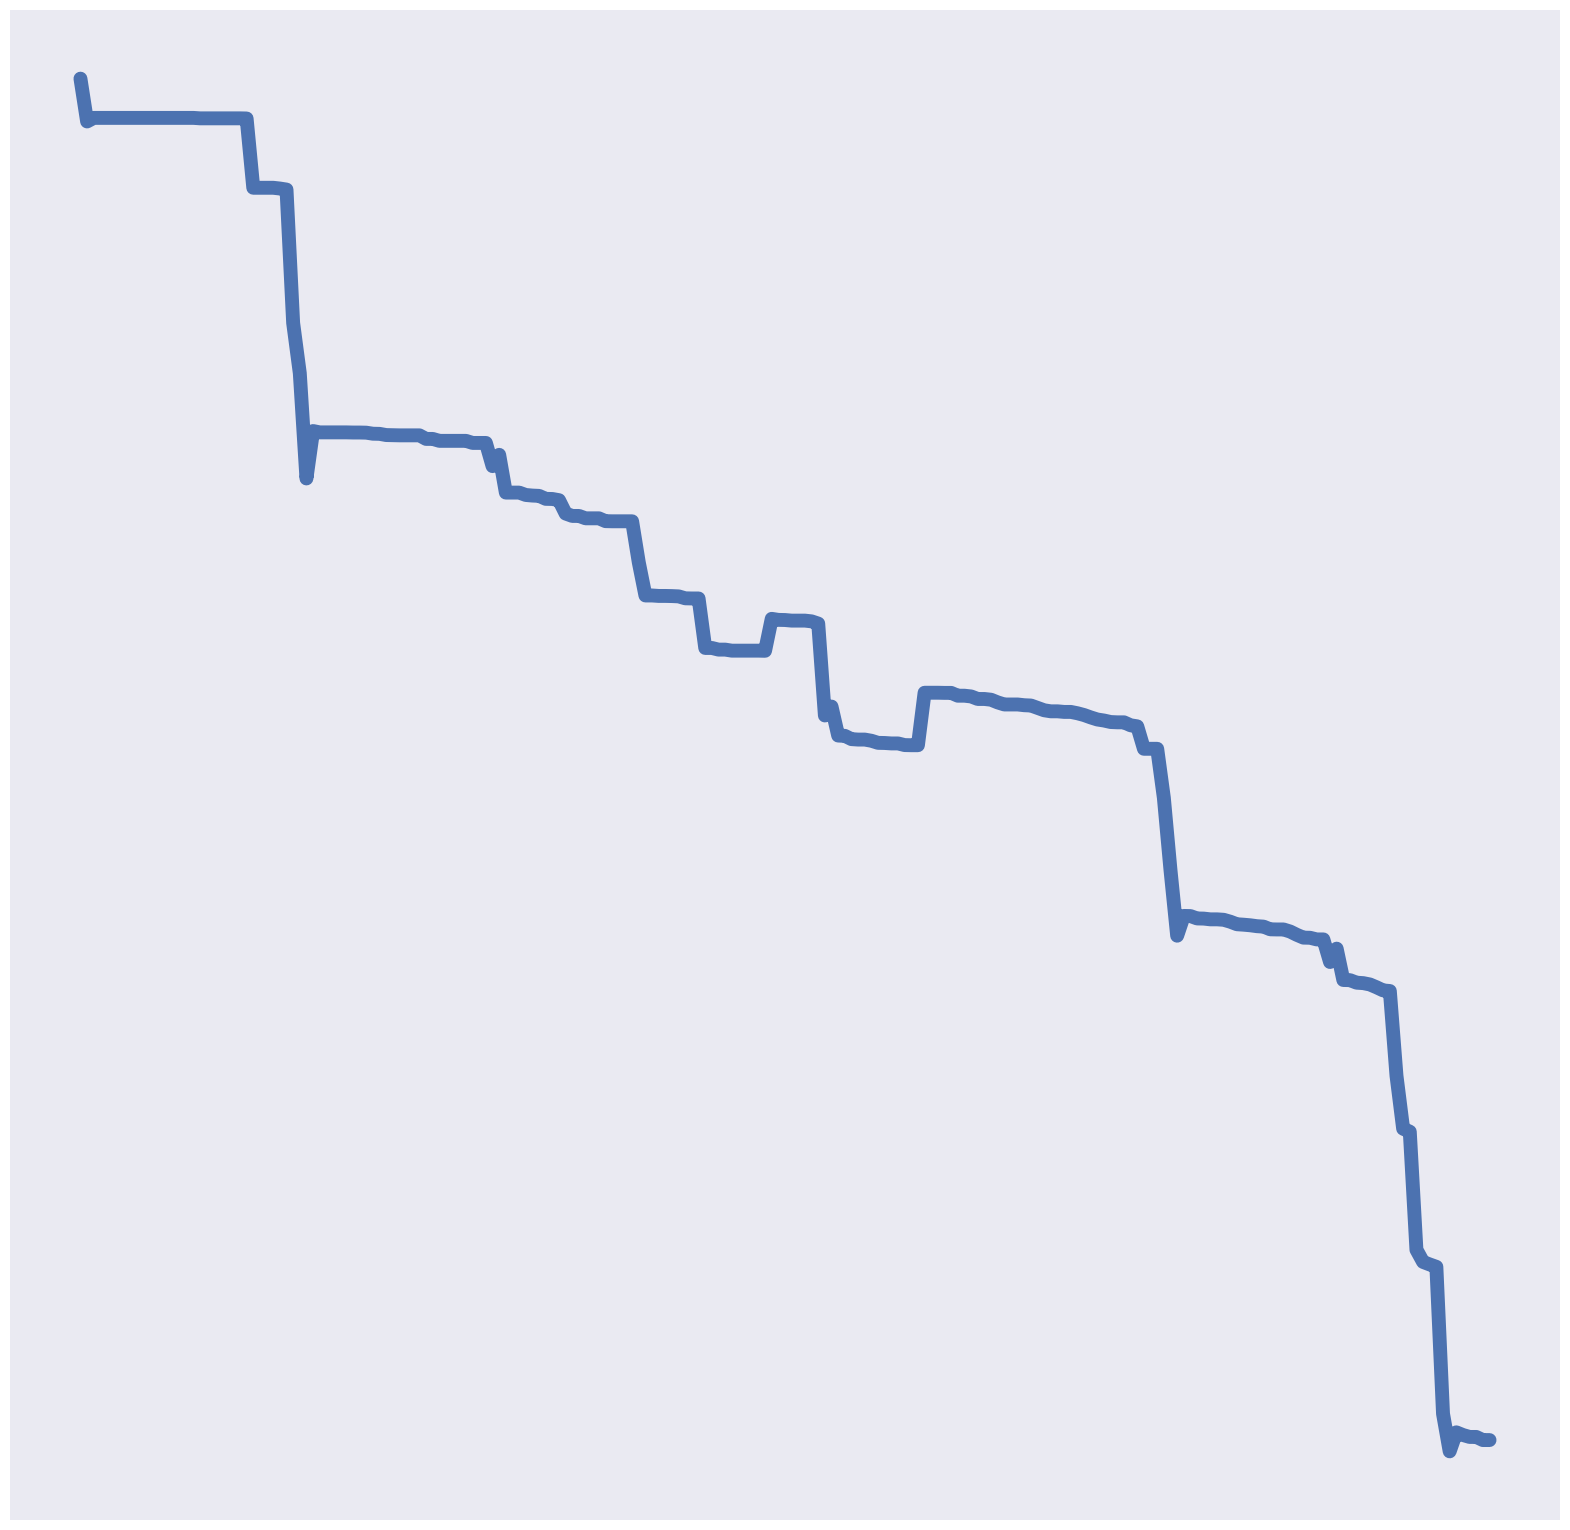

In [99]:
fig = plt.figure(figsize=(20,20))
x_restricted = x[np.where((x>40)&(x<42))]
y_restricted = y[np.where((x>40)&(x<42))]
sns.set(font_scale = 2.5)
plt.plot(x_restricted,y_restricted,lw=10)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

In [8]:
# best_arm = 103077
print "RAND Accuracy"
random_folder = '../experiments/rnaseq100k/rand/'
truths = np.zeros((32,))
for flname in os.listdir(random_folder):
    with open(random_folder+flname,'rb') as f:
        x=pickle.load(f)
        truths += [z[0]==103077 for z in x]    
truths = np.array(truths)/(len(os.listdir(random_folder))+0.0)

print "meddit Accuracy"
mab_folder = '../experiments/rnaseq100k/meddit/'
mab = []
m = 1000
print len(os.listdir(mab_folder))
for flname in os.listdir(mab_folder):
    try:
        with open(mab_folder+flname,'rb') as f:
            x=pickle.load(f)
            answer = x[0][:np.where(x[0]==0)[0][0]]
            accuracy = np.pad(answer==5952, (0,m-len(answer)), 'edge')
            mab += [accuracy]
    except Exception as e:
        print "Wron exp", flname, e
mab_error = 1-np.array(mab).mean(axis=0)
mab_arm = 32+np.arange(0, mab_error.shape[0])*32*32*50/1090000.0

RAND Accuracy
meddit Accuracy
1000


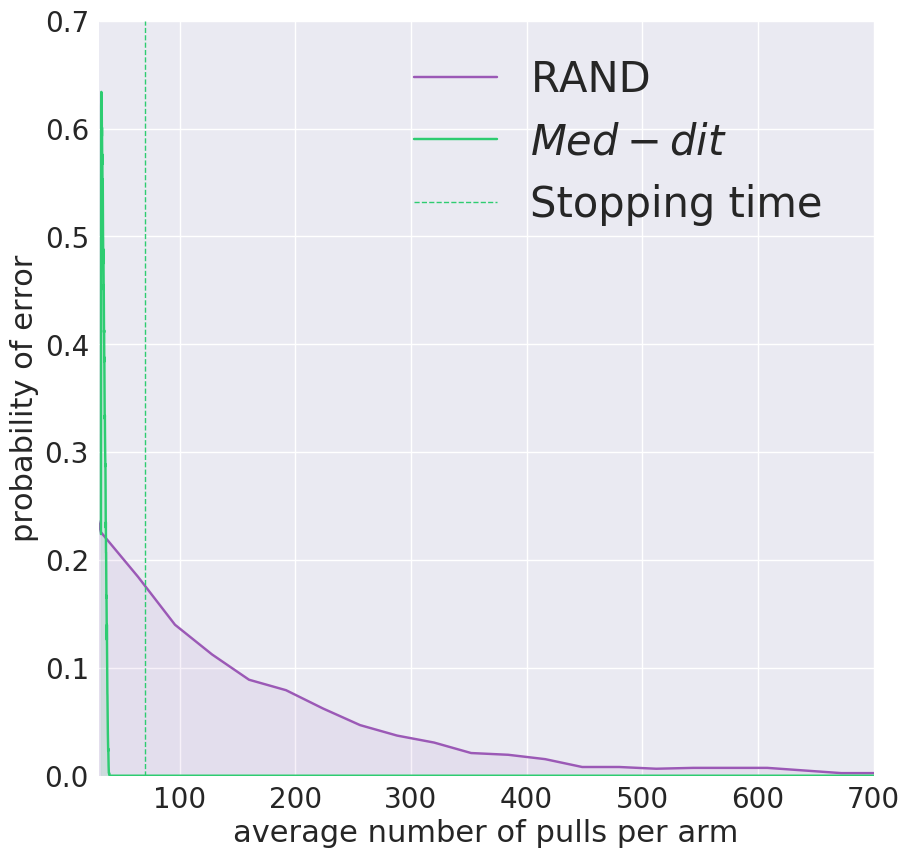

In [10]:
mab_avg_stopping_time = 70
fig = plt.figure(figsize=(10,10))
sns.set(font_scale = 2)
xaxis = np.arange(len(truths))*32
mab_arm[-1] = xaxis[-1]
plt.plot(xaxis, 1-truths, label='RAND', color=colors[0])
plt.fill_between(xaxis, 1-truths,0, color=colors[0], alpha=0.08)
plt.plot(mab_arm, mab_error, label='$Med-dit$',  color=colors[-1])
plt.fill_between(mab_arm, mab_error,0,  color=colors[-1],alpha=0.12)
plt.axvline(mab_avg_stopping_time, linestyle='--', lw=1, color=colors[-1], label="Stopping time ")
plt.legend(prop={'size': 30})
plt.xlabel('average number of pulls per arm')
plt.ylabel('probability of error')
plt.xlim((30,700))
plt.ylim((0,0.7))
plt.show()